In [1]:
%matplotlib inline
import geopandas as gpd
 
from weavingspace import WeaveUnit
from weavingspace import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Biaxial weave

<AxesSubplot:>

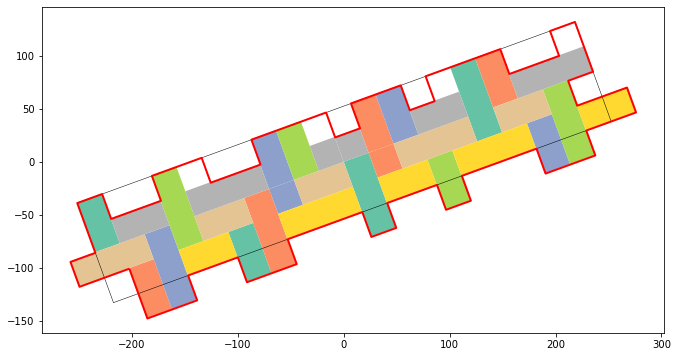

In [3]:
w1 = WeaveUnit(weave_type = "twill", n = 2, spacing = 25, aspect = 1,
               strands = "abcd-|efg-", crs = ak.crs).transform_rotate(20)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6), show_ids = False)

In [4]:
weave1 = Tiling(w1, ak, id_var = "DZ2018")

In [5]:
# import copy

# tiles = copy.deepcopy(weave1.tiles)
# areas = copy.deepcopy(ak)

In [6]:
# tiles.geometry = tiles.centroid
# tiles["tileUID"] = range(tiles.shape[0])

In [7]:
# tiles.sjoin(areas, how = "inner")[["tileUID", "DZ2018"]]

In [8]:
textile1 = weave1.get_tiled_map(# prioritise_tiles = False, 
                                # ragged_edges = False, 
                                debug = True, rotation = 0)

STEP 1: prep data (rotation if requested): 0.000
STEP A5: build lookup for join: 1.624
STEP A6: perform lookup join: 0.077
STEP A7/B3: dissolve tiles within zones: 3.359


In [9]:
textile1.variables = [x for x in ak.columns if "Rank" in x]
textile1.colourmaps = dict(zip(textile1.variables,
                               ("BrBG", "RdGy", "RdYlBu", "Spectral","PiYG", "PRGn", "PuOr")))

Only a list of variables specified, assigning to 
                  available element_ids.


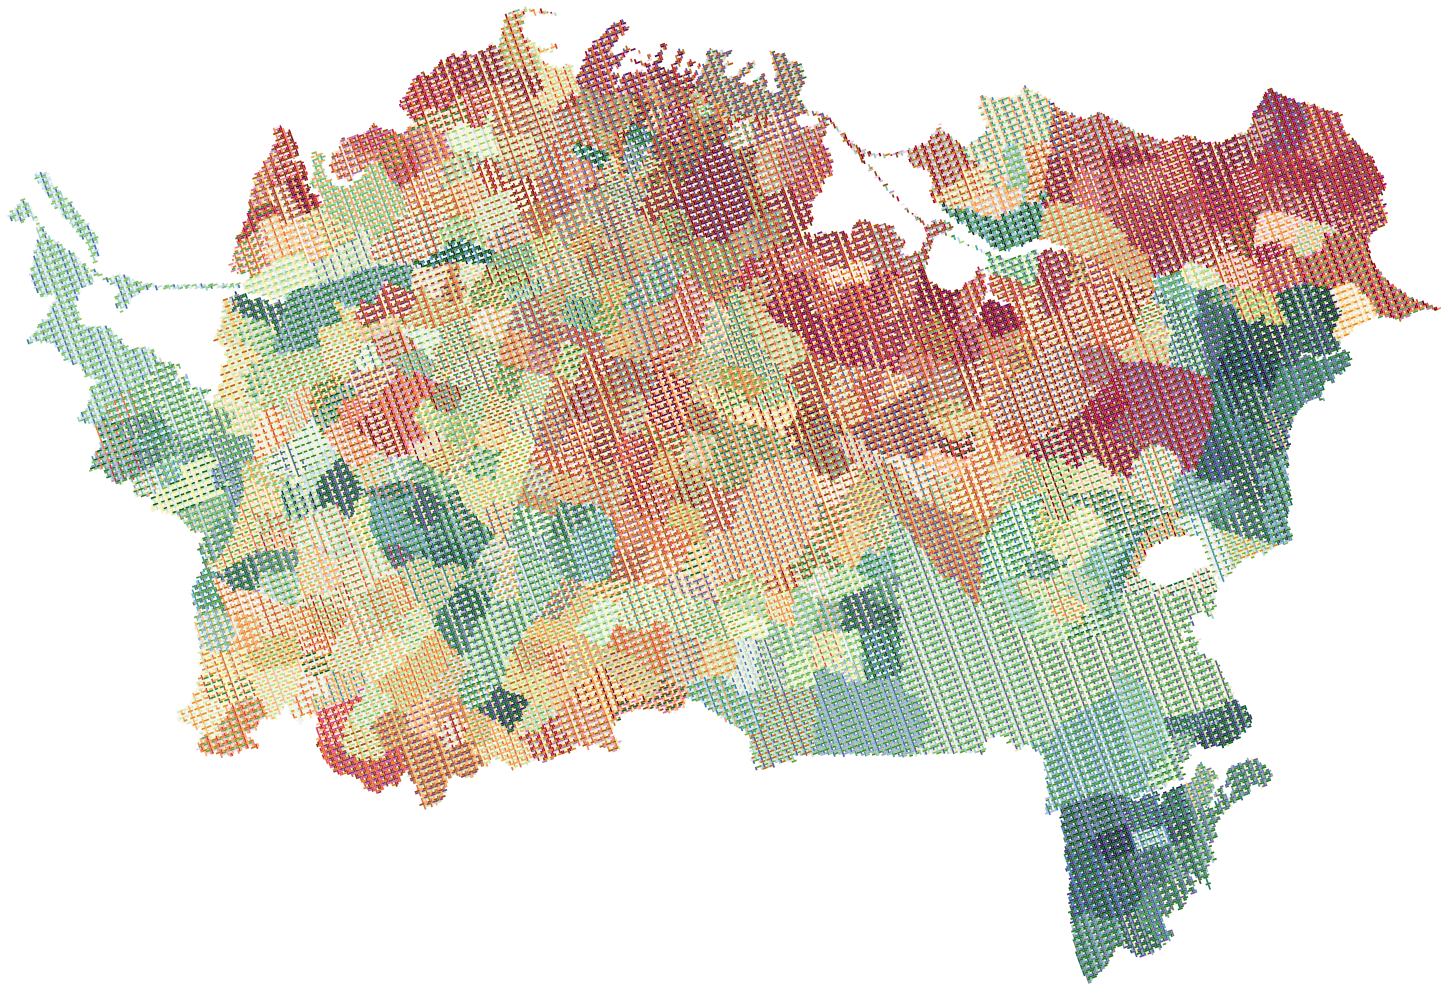

In [10]:
fig = textile1.render(legend = False)

### Exploring alternative steps prioritise tiling elements

In [5]:
import time

tiles = weave1.tiles
tiles.sindex
tiles["tileUID"] = range(tiles.shape[0])

ak.sindex

In [6]:
overlaps = tiles.sjoin(ak)

In [7]:
dups = overlaps.duplicated(subset = ["tileUID"])
mult_overlaps = overlaps.loc[list(dups), ["element_id", "tileUID", "geometry"]]
mult_overlaps.sindex

In [8]:
overlap_areas = mult_overlaps.overlay(ak)
overlap_areas["area"] = overlap_areas.geometry.area

In [9]:
overlap_areas[["tileUID", "DZ2018", "area", "geometry"]]

,tileUID,DZ2018,area,geometry
0,2238,7601312,4383.715975,"POLYGON ((1763966.704 5908531.387, 1764057.881..."
1,2553,7601312,6674.852741,"POLYGON ((1763938.272 5908901.884, 1763994.257..."
2,2561,7601312,12208.422997,"POLYGON ((1763966.704 5908531.387, 1763932.502..."
3,2566,7601312,5704.765315,"POLYGON ((1764026.471 5908659.558, 1763992.269..."
4,2542,7601312,6179.147025,"POLYGON ((1763360.050 5908736.255, 1763360.051..."
...,...,...,...,...
15377,15830,7600780,19845.071578,"POLYGON ((1755427.943 5921173.363, 1755393.741..."
15378,15835,7600780,58.682618,"POLYGON ((1755560.450 5921394.065, 1755561.252..."
15379,15816,7600780,14956.659352,"POLYGON ((1755131.384 5921171.842, 1755121.991..."
15380,15829,7600780,12768.959835,"POLYGON ((1755333.974 5921139.161, 1755299.029..."
